In [1]:
#compare score info from txt file with rootfile information
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load file (assuming in the current repository)

#fname = "./L1Ntuple_first100.root" #using file with 100 events for now
fname = "./L1Ntuple.root" #all events
f = uproot.open(fname)
f.keys()

['l1EventTree;1',
 'l1EventTree/L1EventTree;1',
 'l1CaloTowerTree;1',
 'l1CaloTowerTree/L1CaloTowerTree;1',
 'l1UpgradeTfMuonTree;1',
 'l1UpgradeTfMuonTree/L1UpgradeTfMuonTree;1',
 'l1UpgradeTfMuonShowerTree;1',
 'l1UpgradeTfMuonShowerTree/L1UpgradeTfMuonShowerTree;1',
 'l1UpgradeTree;1',
 'l1UpgradeTree/L1UpgradeTree;1',
 'l1uGTTree;1',
 'l1uGTTree/L1uGTTree;1',
 'l1uGTTestcrateTree;1',
 'l1uGTTestcrateTree/L1uGTTree;1',
 'l1HOTree;1',
 'l1HOTree/L1HOTree;1',
 'l1UpgradeTfMuonEmuTree;1',
 'l1UpgradeTfMuonEmuTree/L1UpgradeTfMuonTree;1',
 'l1CaloTowerEmuTree;1',
 'l1CaloTowerEmuTree/L1CaloTowerTree;1',
 'l1UpgradeEmuTree;1',
 'l1UpgradeEmuTree/L1UpgradeTree;1',
 'l1uGTEmuTree;1',
 'l1uGTEmuTree/L1uGTTree;1']

In [3]:
#get the test crate bits, the emulator bits, and event numbers
a_uGT_crate = f["l1uGTTestcrateTree/L1uGTTree"].arrays()
cratebits = a_uGT_crate.m_algoDecisionInitial
cratebits = ak.to_numpy(cratebits)
print(cratebits.shape) #-> this is (Nevents, 512) for 512 trigger bits of the uGT

a_uGT_emu = f["l1uGTEmuTree/L1uGTTree"].arrays()
emubits = a_uGT_emu.m_algoDecisionInitial
emubits = ak.to_numpy(emubits)
print(emubits.shape) 

a_uGT_event = f["l1EventTree/L1EventTree"].arrays()
event = a_uGT_event.event
event = ak.to_numpy(event)
print(event.shape)

(1811, 512)
(1811, 512)
(1811,)


In [4]:
#map adt names to the bits
#not sure how Artur knew what bits to use
adt_trig_bits = {'L1_ADT_20000': 94, 'L1_ADT_4000': 95, 'L1_ADT_400': 103, 'L1_ADT_80': 108}

In [5]:
#here are my arrays
L1_ADT_20000 = cratebits[:,94]
L1_ADT_4000 = cratebits[:,95]
L1_ADT_400 = cratebits[:,103]
L1_ADT_80 = cratebits[:,108]

L1emu_ADT_20000 = emubits[:,94]
L1emu_ADT_4000 = emubits[:,95]
L1emu_ADT_400 = emubits[:,103]
L1emu_ADT_80 = emubits[:,108]

#can compare two numpy arrays to see what values dont match
comp20000 = L1_ADT_20000 == L1emu_ADT_20000
comp4000  = L1_ADT_4000 == L1emu_ADT_4000
comp400   = L1_ADT_400 == L1emu_ADT_400
comp80    = L1_ADT_80 == L1emu_ADT_80


In [6]:
#n matching and not matching
nmatch =  {'L1_ADT_20000': 0, 'L1_ADT_4000': 0, 'L1_ADT_400': 0, 'L1_ADT_80': 0}

nmatch['L1_ADT_20000'] = sum(comp20000[:])
nmatch['L1_ADT_4000'] = sum(comp4000[:])
nmatch['L1_ADT_400'] = sum(comp400[:])
nmatch['L1_ADT_80'] = sum(comp80[:])

print("Total N events Test Crate: %i" %len(cratebits))
print("Total N events Emulator: %i" %len(emubits))
sum(comp20000[:])

Total N events Test Crate: 1811
Total N events Emulator: 1811


1811

In [7]:
#now let's read the text file with score information for this set of events
import re

#loss_values = []
score_values = []
results = []

# Open the file for reading
with open("L1Ntuple_info.txt", "r") as file: #all events 
#with open("L1Ntuple_info_first100.txt", "r") as file: #first 100 events
    
    # Iterate through each line in the file
    for line in file:
        # Use regular expression to find all numbers after "loss: "
     #   matches_loss = re.findall(r'loss: (\d+\.\d+)', line)
        matches_score = re.findall(r'score: (\d+)', line)
        
        # If there are matches, append them to the list
      #  if matches_loss:
       #     loss_values.extend(float(match) for match in matches_loss)
        if matches_score:
            score_values.extend(float(match) for match in matches_score)

        #store pass or fail as true or false:
        if "PASS!" in line:
            results.append(True)
        elif "FAIL!" in line:
            results.append(False)
            
# Print the list of loss values
#print(loss_values)
#print(score_values)
#print(len(loss_values))
print(len(score_values))
#print(results)
print(len(results))

7244
7244


In [8]:
#we only need every 4th value
#score_values is loss*16
score_values_perevt = score_values[3::4]

#score_values_perevt
len(score_values_perevt)

1811

In [9]:
#store the pass/fail value per event per threshold
results_20000 = results[0::4]
results_400 = results[2::4]
results_4000 = results[1::4]
results_80 = results[3::4]
len(results_4000)
len(results_20000)


1811

In [10]:
#see that the sums match by counting how many passing events
root4k = sum(L1emu_ADT_4000[:])
root400 = sum(L1emu_ADT_400[:])
root20k = sum(L1emu_ADT_20000[:])
root80 = sum(L1emu_ADT_80[:])
print('from emulator rootfile:')
print(root80); print(root400); print(root4k); print(root20k)

text4k = sum(results_4000[:])
text400 = sum(results_400[:])
text20k = sum(results_20000[:])
text80 = sum(results_80[:])
print('from textfile:')
print(text80); print(text400); print(text4k); print(text20k)

from emulator rootfile:
1793
1613
146
0
from textfile:
1793
1613
146
0


In [11]:
#now we need to check that the order of events is the same as in the file...
#open new file with event record

#event_numbers = []

#with open("eventrecord_first100.txt", "r") as file:
    # Iterate through each line in the file
   # for line in file:
  #      events = re.findall(r', Event (\d+)', line)
 #       if events:
#            event_numbers.extend(int(evt) for evt in events)

#print(len(event_numbers))
#print("order filled in file:")
#print(event_numbers)
#print("order stored in root:")
#print(event)

#so they look fine, we dont have to worry about them being out of order. nice

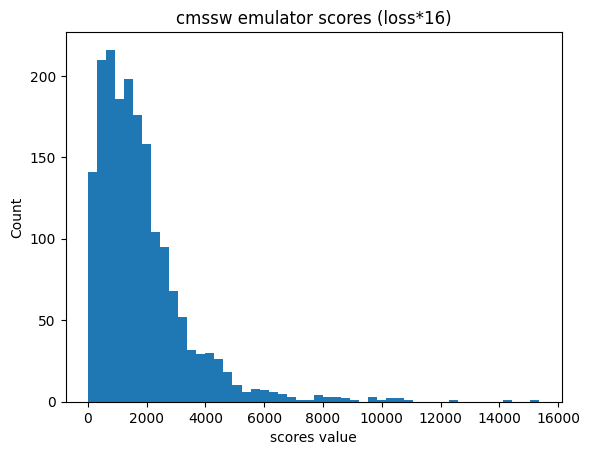

In [12]:
#ok so now lets make a histogram of the emulator scores overall
score_values_perevt
# Create a histogram
plt.hist(score_values_perevt, bins=50)#, color='blue')

# Add labels and a title
plt.xlabel('scores value')
plt.ylabel('Count')
plt.title('cmssw emulator scores (loss*16)')

# Show the histogram
plt.show()

In [13]:
#now lets make a list of the values that dont match each other 
mismatch80 = []
mismatch400 = []
mismatch4k = []
mismatch20k = []

for i in range(len(score_values_perevt)):
    #print(i)
    if not comp80[i]:
        mismatch80.append(score_values_perevt[i])
    if not comp400[i]:
        mismatch400.append(score_values_perevt[i])
    if not comp4000[i]:
        mismatch4k.append(score_values_perevt[i])
    if not comp20000[i]:
        mismatch20k.append(score_values_perevt[i])
        print(score_values_perevt[i])

#100-len(mismatch4k)
mismatch20k
sum(comp20000[:])
#len(score_values_perevt)

1811

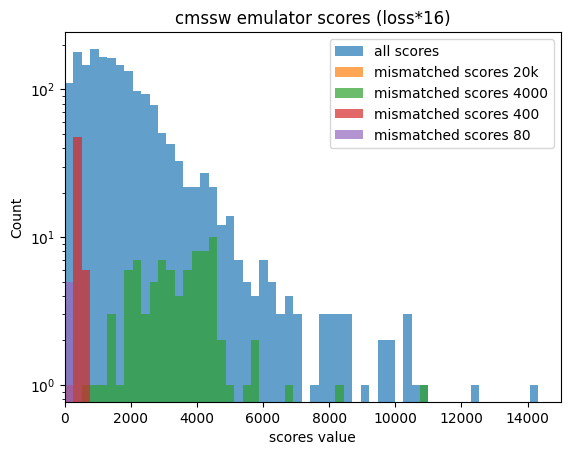

5
55
86
0


[73.0, 111.0, 91.0, 50.0, 78.0]

In [14]:
#add these arrays

scorehist, bin_edges = np.histogram(score_values_perevt, bins=60)
hist80, _ = np.histogram(mismatch80, bins=bin_edges)
hist400, _ = np.histogram(mismatch400, bins=bin_edges)
hist4k, _ = np.histogram(mismatch4k, bins=bin_edges)
hist20k, _ = np.histogram(mismatch20k, bins=bin_edges)

plt.hist(score_values_perevt, bins=bin_edges, alpha=0.7, label='all scores')
plt.hist(mismatch20k, bins=bin_edges, alpha=0.7, label='mismatched scores 20k')
plt.hist(mismatch4k, bins=bin_edges, alpha=0.7, label='mismatched scores 4000')
plt.hist(mismatch400, bins=bin_edges, alpha=0.7, label='mismatched scores 400')
plt.hist(mismatch80, bins=bin_edges, alpha=0.7, label='mismatched scores 80')

# Add labels and a title
plt.xlabel('scores value')
plt.ylabel('Count')
plt.title('cmssw emulator scores (loss*16)')
plt.legend()
plt.yscale('log')
plt.xlim(0, 15000)

# Show the histogram
plt.show()
print(len(mismatch80)); print(len(mismatch400)); print(len(mismatch4k)); print(len(mismatch20k))
mismatch80


In [15]:
#let's see whether these are passing when they should have failed or vice versa
totevts = len(emubits)

#initialized to falses
epass_cfail_80 = [False]*totevts
efail_cpass_80 = [False]*totevts
epass_cfail_400 = [False]*totevts
efail_cpass_400 = [False]*totevts
epass_cfail_4k = [False]*totevts
efail_cpass_4k = [False]*totevts
epass_cfail_20k = [False]*totevts
efail_cpass_20k = [False]*totevts

for i in range(totevts): 
    #80
    if (L1emu_ADT_80[i] != L1_ADT_80[i] ):
        print('THR 80-> i: '+str(i)+' emu: '+str(L1emu_ADT_80[i])+' crate: '+str(L1_ADT_80[i]))
        if L1emu_ADT_80[i]: #emu pass, crate fail 
            epass_cfail_80[i] = True
        elif not L1emu_ADT_80[i]:
            efail_cpass_80[i] = True #emu fail, crate pass 
            
    if (L1emu_ADT_400[i] != L1_ADT_400[i] ):
        print('THR 400-> i: '+str(i)+' emu: '+str(L1emu_ADT_400[i])+' crate: '+str(L1_ADT_400[i]))
        if L1emu_ADT_400[i]: #emu pass, crate fail 
            epass_cfail_400[i] = True
        elif not L1emu_ADT_400[i]:
            efail_cpass_400[i] = True #emu fail, crate pass
            
    if (L1emu_ADT_4000[i] != L1_ADT_4000[i] ):
        print('THR 4k-> i: '+str(i)+' emu: '+str(L1emu_ADT_4000[i])+' crate: '+str(L1_ADT_4000[i]))
        if L1emu_ADT_4000[i]: #emu pass, crate fail 
            epass_cfail_4k[i] = True
        elif not L1emu_ADT_4000[i]:
            efail_cpass_4k[i] = True #emu fail, crate pass 
    
    if (L1emu_ADT_20000[i] != L1_ADT_20000[i] ):
        print('THR 20k-> i: '+str(i)+' emu: '+str(L1emu_ADT_20000[i])+' crate: '+str(L1_ADT_20000[i]))
        if L1emu_ADT_20000[i]: #emu pass, crate fail 
            epass_cfail_20k[i] = True
        elif not L1emu_ADT_20000[i]:
            efail_cpass_20k[i] = True #emu fail, crate pass 

#check that it makes sense
print(sum(efail_cpass_400))
print(sum(epass_cfail_400))
print(sum(epass_cfail_400) + sum(efail_cpass_400))

THR 400-> i: 7 emu: True crate: False
THR 400-> i: 16 emu: True crate: False
THR 4k-> i: 23 emu: True crate: False
THR 4k-> i: 30 emu: False crate: True
THR 4k-> i: 35 emu: True crate: False
THR 4k-> i: 46 emu: False crate: True
THR 4k-> i: 48 emu: True crate: False
THR 4k-> i: 60 emu: False crate: True
THR 4k-> i: 67 emu: False crate: True
THR 400-> i: 94 emu: False crate: True
THR 4k-> i: 102 emu: False crate: True
THR 400-> i: 124 emu: False crate: True
THR 4k-> i: 129 emu: False crate: True
THR 400-> i: 145 emu: True crate: False
THR 400-> i: 160 emu: False crate: True
THR 4k-> i: 174 emu: True crate: False
THR 4k-> i: 194 emu: True crate: False
THR 4k-> i: 202 emu: False crate: True
THR 4k-> i: 240 emu: False crate: True
THR 4k-> i: 242 emu: False crate: True
THR 4k-> i: 245 emu: False crate: True
THR 400-> i: 313 emu: False crate: True
THR 400-> i: 337 emu: False crate: True
THR 4k-> i: 348 emu: False crate: True
THR 4k-> i: 362 emu: True crate: False
THR 4k-> i: 407 emu: False c

In [16]:
#let's make a dataframe to print this shit nicely
import pandas as pd
Tc = len(cratebits)
Te = len(emubits)

table = {'Threshold': ['80', '400', '4k', '20k'],
        '# pass emulator': [sum(L1emu_ADT_80), sum(L1emu_ADT_400), sum(L1emu_ADT_4000), sum(L1emu_ADT_20000)],
        '# pass crate': [sum(L1_ADT_80), sum(L1_ADT_400), sum(L1_ADT_4000), sum(L1_ADT_20000)],
        '# fail emulator': [Te-sum(L1emu_ADT_80), Te-sum(L1emu_ADT_400), Te-sum(L1emu_ADT_4000), Te-sum(L1emu_ADT_20000)],
        '# fail crate': [Te-sum(L1_ADT_80), Te-sum(L1_ADT_400), Te-sum(L1_ADT_4000), Te-sum(L1_ADT_20000)],
        '% pass crate': [(sum(L1_ADT_80))/Te, (sum(L1_ADT_400))/Te, (sum(L1_ADT_4000))/Te, (sum(L1_ADT_20000))/Te],
        '% pass emulator': [sum(L1emu_ADT_80)/Te, sum(L1emu_ADT_400)/Te, sum(L1emu_ADT_4000)/Te, sum(L1emu_ADT_20000)/Te],
        '# mismatch': [Te-sum(comp80), Te-sum(comp400), Te-sum(comp4000), Te-sum(comp20000)],
     #   '% mismatch (#mismatch/#pass emu)': [(Te-sum(comp80))/sum(L1emu_ADT_80), (Te-sum(comp400))/sum(L1emu_ADT_400), (Te-sum(comp4000))/sum(L1emu_ADT_4000), (Te-sum(comp20000))/sum(L1emu_ADT_20000)],
        '# pass emu + fail crate': [sum(epass_cfail_80), sum(epass_cfail_400), sum(epass_cfail_4k), sum(epass_cfail_20k)],
        '# fail emu + pass crate': [sum(efail_cpass_80), sum(efail_cpass_400), sum(efail_cpass_4k), sum(efail_cpass_20k)],
        }
tbl = pd.DataFrame(table)


print(tbl)

  Threshold  # pass emulator  # pass crate  # fail emulator  # fail crate  \
0        80             1793          1794               18            17   
1       400             1613          1602              198           209   
2        4k              146           172             1665          1639   
3       20k                0             0             1811          1811   

   % pass crate  % pass emulator  # mismatch  # pass emu + fail crate  \
0      0.990613         0.990061           5                        2   
1      0.884594         0.890668          55                       33   
2      0.094975         0.080618          86                       30   
3      0.000000         0.000000           0                        0   

   # fail emu + pass crate  
0                        3  
1                       22  
2                       56  
3                        0  


1793
18
3
2


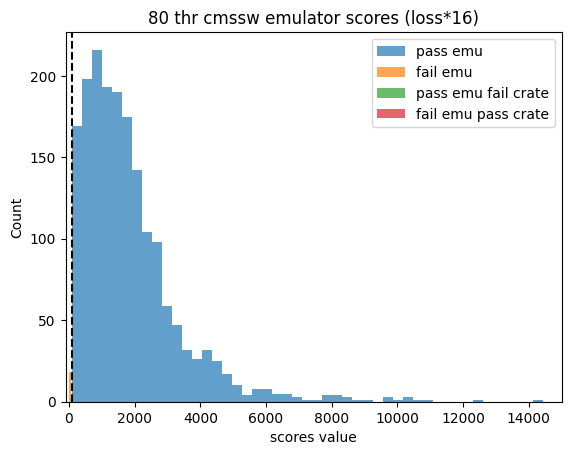

array([55., 25., 73., 14., 26., 16., 22., 50., 15., 50., 78., 15., 69.,
       58., 72., 15., 76., 73.])

In [55]:
#start with threshold 80

#ok so now lets make a histogram of the emulator scores overall THAT PASS A CERTAIN THRESHOLD

#have to mask with the ones actually passing the emulator
score_values_perevt = np.array(score_values_perevt)
pscores80 = score_values_perevt[L1emu_ADT_80]
fscores80 = score_values_perevt[~L1emu_ADT_80]
print(len(pscores80)) #should match #pass
print(len(fscores80))


epass_cfail_80 = np.array(epass_cfail_80)
efail_cpass_80 = np.array(efail_cpass_80)
misfscores80 = score_values_perevt[efail_cpass_80]
mispscores80 = score_values_perevt[epass_cfail_80]
print(len(misfscores80))
print(len(mispscores80))


# Create a histogram
plt.hist(pscores80 , bins=50, alpha=0.7, label='pass emu')
plt.hist(fscores80 , bins=1, alpha=0.7, label='fail emu')
plt.hist(mispscores80, bins=1, alpha=0.7, label='pass emu fail crate')
plt.hist(misfscores80, bins=1, alpha=0.7, label='fail emu pass crate')

#vertical line at threshold
plt.axvline(x=80, color='black', linestyle='--')

# Add labels and a title
plt.xlabel('scores value')
plt.ylabel('Count')
plt.title('80 thr cmssw emulator scores (loss*16)')
plt.legend()
plt.xlim(-100, 15000)
#plt.yscale('log')

# Show the histogram
plt.show()
fscores80

1613
198
22
33


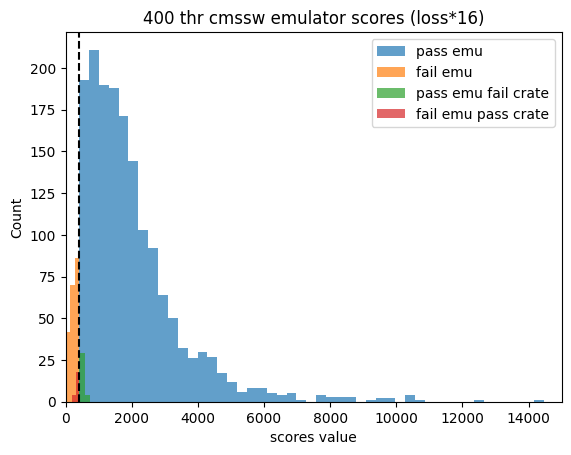

In [54]:
#threshold 400

#ok so now lets make a histogram of the emulator scores overall THAT PASS A CERTAIN THRESHOLD

#have to mask with the ones actually passing the emulator
score_values_perevt = np.array(score_values_perevt)
pscores400 = score_values_perevt[L1emu_ADT_400]
fscores400 = score_values_perevt[~L1emu_ADT_400]
print(len(pscores400)) #should match #pass
print(len(fscores400)) #should match #pass


epass_cfail_400 = np.array(epass_cfail_400)
efail_cpass_400 = np.array(efail_cpass_400)
misfscores400 = score_values_perevt[efail_cpass_400]
mispscores400 = score_values_perevt[epass_cfail_400]
print(len(misfscores400))
print(len(mispscores400))

# Create a histogram
plt.hist(pscores400 , bins=50, alpha=0.7, label='pass emu')
plt.hist(fscores400 , bins=3, alpha=0.7, label='fail emu')
plt.hist(mispscores400, bins=2, alpha=0.7, label='pass emu fail crate')
plt.hist(misfscores400, bins=2, alpha=0.7, label='fail emu pass crate')

#vertical line at threshold
plt.axvline(x=400, color='black', linestyle='--')

# Add labels and a title
plt.xlabel('scores value')
plt.ylabel('Count')
plt.title('400 thr cmssw emulator scores (loss*16)')
plt.legend()
#plt.yscale('log')
plt.xlim(0, 15000)

# Show the histogram
plt.show()


146
1665
56
30


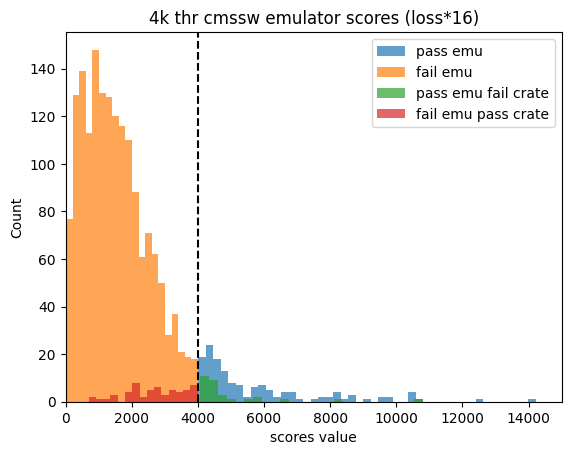

In [59]:
#threshold 4k

#ok so now lets make a histogram of the emulator scores overall THAT PASS A CERTAIN THRESHOLD

#have to mask with the ones actually passing the emulator
score_values_perevt = np.array(score_values_perevt)
pscores4k = score_values_perevt[L1emu_ADT_4000]
fscores4k = score_values_perevt[~L1emu_ADT_4000]
print(len(pscores4k)) #should match #pass
print(len(fscores4k))


epass_cfail_4k = np.array(epass_cfail_4k)
efail_cpass_4k = np.array(efail_cpass_4k)
misfscores4k = score_values_perevt[efail_cpass_4k]
mispscores4k = score_values_perevt[epass_cfail_4k]
print(len(misfscores4k))
print(len(mispscores4k))

# Create a histogram
plt.hist(pscores4k , bins=50, alpha=0.7, label='pass emu')
plt.hist(fscores4k , bins=20, alpha=0.7, label='fail emu')
plt.hist(mispscores4k, bins=25, alpha=0.7, label='pass emu fail crate')
plt.hist(misfscores4k, bins=15, alpha=0.7, label='fail emu pass crate')

#vertical line at threshold
plt.axvline(x=4000, color='black', linestyle='--')

# Add labels and a title
plt.xlabel('scores value')
plt.ylabel('Count')
plt.title('4k thr cmssw emulator scores (loss*16)')
plt.legend()
plt.xlim(0, 15000)
#plt.yscale('log')

# Show the histogram
plt.show()


0


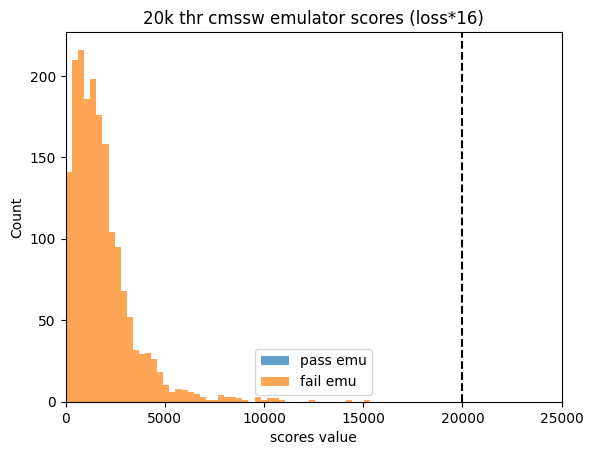

In [58]:
#threshold  20k

#ok so now lets make a histogram of the emulator scores overall THAT PASS A CERTAIN THRESHOLD

#have to mask with the ones actually passing the emulator
score_values_perevt = np.array(score_values_perevt)
pscores20k = score_values_perevt[L1emu_ADT_20000]
fscores20k = score_values_perevt[~L1emu_ADT_20000]
print(len(scores20k)) #should match #pass

# Create a histogram
plt.hist(pscores20k , bins=50, alpha=0.7, label='pass emu')
plt.hist(fscores20k , bins=50, alpha=0.7, label='fail emu')

#vertical line at threshold
plt.axvline(x=20000, color='black', linestyle='--')

# Add labels and a title
plt.xlabel('scores value')
plt.ylabel('Count')
plt.title('20k thr cmssw emulator scores (loss*16)')
plt.xlim(0, 25000)
plt.legend()
#plt.yscale('log')

# Show the histogram
plt.show()
#there are none